In [13]:
from scipy import stats
from scipy.stats import PearsonRConstantInputWarning
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import math, matplotlib as mpl, matplotlib.pyplot as plt, numpy as np, pandas as pd

In [14]:
df = pd.read_pickle('AmesHousing_Encoded_Combined.pkl')
df.drop(columns=['Lot Frontage'], inplace=True)
cols = list(df.columns)

X, y = df.iloc[:,:-1].values, df.iloc[:,-1].values

In [15]:
feat_cols, target_col = cols[:-1], cols[-1]

In [16]:
print(len(feat_cols)**2) # total number of potential 'product features' formed by products of current features

50625


In [37]:
target_corr_thresh = 0.25
strong_corr_prods = list()

for col_1 in feat_cols:
    for col_2 in feat_cols:
        
        try:
            
            pearsonr = stats.pearsonr(np.multiply(df[col_1].values, df[col_2].values),y)
            pearson = pearsonr[0]
            
            if not math.isnan(pearson):
                if pearson > target_corr_thresh:
                    if set([col_1, col_2]) not in strong_corr_prods:
                        
                        prod_str = col_1 + ' x ' + col_2
                        print(prod_str + ' '*(37-len(prod_str)) + 
                         '+'*(int(pearson > 0.0)) + str(np.around(pearson,4)))
                    
                        strong_corr_prods.append(set([col_1, col_2]))
                    
        except PearsonRConstantInputWarning:
            
            pass

MS SubClass_20 x Neighborhood_NridgHt+0.34
MS SubClass_20 x Mas Vnr Type_Stone  +0.2602
MS SubClass_20 x Foundation_PConc    +0.3322
MS SubClass_20 x Exter Qual          +0.4555
MS SubClass_20 x Bsmt Qual           +0.3386
MS SubClass_20 x Bsmt Exposure       +0.3392
MS SubClass_20 x Kitchen Qual        +0.4049
MS SubClass_20 x Garage Finish       +0.3355
MS SubClass_20 x Mas Vnr Area        +0.3414
MS SubClass_20 x Fireplaces          +0.2672
MS SubClass_60 x MS SubClass_60      +0.3463
MS SubClass_60 x MS Zoning_RL        +0.3254
MS SubClass_60 x Street_Pave         +0.3463
MS SubClass_60 x Land Contour_Lvl    +0.3209
MS SubClass_60 x Lot Config_Inside   +0.253
MS SubClass_60 x Neighborhood_NoRidge+0.2715
MS SubClass_60 x Neighborhood_NridgHt+0.2974
MS SubClass_60 x Condition 1_Norm    +0.3464
MS SubClass_60 x Condition 2_Norm    +0.3465
MS SubClass_60 x Bldg Type_1Fam      +0.3463
MS SubClass_60 x House Style_2Story  +0.3444
MS SubClass_60 x Roof Style_Hip      +0.3038
MS SubClass_6

Lot Config_CulDSac x Exter Qual      +0.264
Lot Config_Inside x Neighborhood_NridgHt+0.37
Lot Config_Inside x Mas Vnr Type_Stone+0.2526
Lot Config_Inside x Foundation_PConc +0.3637
Lot Config_Inside x Sale Type_New    +0.2737
Lot Config_Inside x Sale Condition_Partial+0.2697
Lot Config_Inside x Exter Qual       +0.5134
Lot Config_Inside x Bsmt Qual        +0.3904
Lot Config_Inside x Bsmt Exposure    +0.3366
Lot Config_Inside x Heating QC       +0.2706
Lot Config_Inside x Kitchen Qual     +0.4917
Lot Config_Inside x Garage Finish    +0.4082
Lot Config_Inside x Mas Vnr Area     +0.3716
Lot Config_Inside x BsmtFin SF 1     +0.2759
Lot Config_Inside x Total Bsmt SF    +0.2504
Lot Config_Inside x Gr Liv Area      +0.2529
Lot Config_Inside x Fireplaces       +0.3123
Lot Config_Inside x Garage Cars      +0.2524
Lot Config_Inside x Garage Area      +0.262
Neighborhood_NoRidge x Neighborhood_NoRidge+0.2988
Neighborhood_NoRidge x Condition 1_Norm+0.2988
Neighborhood_NoRidge x Condition 2_Norm+0.

Bldg Type_1Fam x House Style_2Story  +0.2861
Bldg Type_1Fam x Roof Style_Hip      +0.2569
Bldg Type_1Fam x Exterior 1st_VinylSd+0.3403
Bldg Type_1Fam x Exterior 2nd_VinylSd+0.3381
Bldg Type_1Fam x Mas Vnr Type_BrkFace+0.2538
Bldg Type_1Fam x Mas Vnr Type_Stone  +0.3212
Bldg Type_1Fam x Foundation_PConc    +0.4994
Bldg Type_1Fam x Garage Type_Attchd  +0.2774
Bldg Type_1Fam x Sale Type_New       +0.3435
Bldg Type_1Fam x Sale Condition_Partial+0.3377
Bldg Type_1Fam x Overall Qual        +0.448
Bldg Type_1Fam x Exter Qual          +0.6704
Bldg Type_1Fam x Bsmt Qual           +0.6178
Bldg Type_1Fam x Bsmt Exposure       +0.3926
Bldg Type_1Fam x BsmtFin Type 1      +0.3041
Bldg Type_1Fam x Heating QC          +0.4011
Bldg Type_1Fam x Kitchen Qual        +0.6372
Bldg Type_1Fam x Garage Finish       +0.5026
Bldg Type_1Fam x Lot Area            +0.271
Bldg Type_1Fam x Mas Vnr Area        +0.5275
Bldg Type_1Fam x BsmtFin SF 1        +0.3962
Bldg Type_1Fam x Total Bsmt SF       +0.4739
Bldg Type_

Exterior 2nd_VinylSd x Exterior 2nd_VinylSd+0.3255
Exterior 2nd_VinylSd x Mas Vnr Type_BrkFace+0.28
Exterior 2nd_VinylSd x Mas Vnr Type_Stone+0.296
Exterior 2nd_VinylSd x Foundation_PConc+0.4083
Exterior 2nd_VinylSd x Heating_GasA  +0.3255
Exterior 2nd_VinylSd x Central Air_Y +0.3345
Exterior 2nd_VinylSd x Garage Type_Attchd+0.3282
Exterior 2nd_VinylSd x Sale Type_New +0.2617
Exterior 2nd_VinylSd x Sale Condition_Partial+0.2596
Exterior 2nd_VinylSd x Utilities     +0.3255
Exterior 2nd_VinylSd x Land Slope    +0.3199
Exterior 2nd_VinylSd x Overall Qual  +0.4228
Exterior 2nd_VinylSd x Overall Cond  +0.2892
Exterior 2nd_VinylSd x Exter Qual    +0.4965
Exterior 2nd_VinylSd x Bsmt Qual     +0.4709
Exterior 2nd_VinylSd x Bsmt Cond     +0.3085
Exterior 2nd_VinylSd x Heating QC    +0.381
Exterior 2nd_VinylSd x Electrical    +0.3349
Exterior 2nd_VinylSd x Kitchen Qual  +0.507
Exterior 2nd_VinylSd x Functional    +0.3292
Exterior 2nd_VinylSd x Garage Finish +0.4003
Exterior 2nd_VinylSd x Garage 

Central Air_Y x Heating QC           +0.4466
Central Air_Y x Electrical           +0.263
Central Air_Y x Kitchen Qual         +0.6758
Central Air_Y x Garage Finish        +0.5047
Central Air_Y x Lot Area             +0.2973
Central Air_Y x Mas Vnr Area         +0.5024
Central Air_Y x BsmtFin SF 1         +0.425
Central Air_Y x Total Bsmt SF        +0.6272
Central Air_Y x 1st Flr SF           +0.6218
Central Air_Y x 2nd Flr SF           +0.2935
Central Air_Y x Gr Liv Area          +0.701
Central Air_Y x Bsmt Full Bath       +0.2812
Central Air_Y x Full Bath            +0.5626
Central Air_Y x Half Bath            +0.2732
Central Air_Y x TotRms AbvGrd        +0.5238
Central Air_Y x Fireplaces           +0.4632
Central Air_Y x Garage Cars          +0.6452
Central Air_Y x Garage Area          +0.6344
Central Air_Y x Wood Deck SF         +0.32
Central Air_Y x Open Porch SF        +0.3405
Garage Type_Attchd x Garage Type_Attchd+0.2988
Garage Type_Attchd x Sale Type_New   +0.2947
Garage Type_A

Utilities x Overall Qual             +0.7888
Utilities x Exter Qual               +0.6899
Utilities x Bsmt Qual                +0.6741
Utilities x Bsmt Exposure            +0.3977
Utilities x BsmtFin Type 1           +0.3
Utilities x Heating QC               +0.4387
Utilities x Kitchen Qual             +0.67
Utilities x Garage Finish            +0.5174
Utilities x Lot Area                 +0.2634
Utilities x Year Built               +0.268
Utilities x Mas Vnr Area             +0.5008
Utilities x BsmtFin SF 1             +0.413
Utilities x Total Bsmt SF            +0.6305
Utilities x 1st Flr SF               +0.63
Utilities x 2nd Flr SF               +0.265
Utilities x Gr Liv Area              +0.7148
Utilities x Bsmt Full Bath           +0.263
Utilities x Full Bath                +0.5553
Utilities x Half Bath                +0.2691
Utilities x TotRms AbvGrd            +0.5219
Utilities x Fireplaces               +0.4539
Utilities x Garage Cars              +0.6518
Utilities x Garage Ar

Electrical x Kitchen Qual            +0.6801
Electrical x Garage Finish           +0.5122
Electrical x Paved Drive             +0.2554
Electrical x Lot Area                +0.2944
Electrical x Mas Vnr Area            +0.5067
Electrical x BsmtFin SF 1            +0.4255
Electrical x Total Bsmt SF           +0.64
Electrical x 1st Flr SF              +0.6359
Electrical x 2nd Flr SF              +0.2878
Electrical x Gr Liv Area             +0.7126
Electrical x Bsmt Full Bath          +0.2806
Electrical x Full Bath               +0.5639
Electrical x Half Bath               +0.2811
Electrical x TotRms AbvGrd           +0.537
Electrical x Fireplaces              +0.4718
Electrical x Garage Cars             +0.6492
Electrical x Garage Area             +0.6375
Electrical x Wood Deck SF            +0.3189
Electrical x Open Porch SF           +0.333
Kitchen Qual x Kitchen Qual          +0.6643
Kitchen Qual x Functional            +0.6679
Kitchen Qual x Garage Finish         +0.6366
Kitchen Qual x

Bsmt Unf SF x Total Bsmt SF          +0.3336
Bsmt Unf SF x 1st Flr SF             +0.326
Bsmt Unf SF x 2nd Flr SF             +0.2658
Bsmt Unf SF x Gr Liv Area            +0.3808
Bsmt Unf SF x Bsmt Full Bath         +0.2824
Bsmt Unf SF x Full Bath              +0.3233
Bsmt Unf SF x Half Bath              +0.2863
Bsmt Unf SF x TotRms AbvGrd          +0.2831
Bsmt Unf SF x Fireplaces             +0.4142
Bsmt Unf SF x Garage Cars            +0.362
Bsmt Unf SF x Garage Area            +0.3675
Bsmt Unf SF x Wood Deck SF           +0.3379
Bsmt Unf SF x Open Porch SF          +0.2948
Total Bsmt SF x Total Bsmt SF        +0.52
Total Bsmt SF x 1st Flr SF           +0.5574
Total Bsmt SF x 2nd Flr SF           +0.4089
Total Bsmt SF x Gr Liv Area          +0.658
Total Bsmt SF x Bsmt Full Bath       +0.4299
Total Bsmt SF x Full Bath            +0.7195
Total Bsmt SF x Half Bath            +0.4365
Total Bsmt SF x Bedroom AbvGr        +0.5402
Total Bsmt SF x Kitchen AbvGr        +0.4962
Total Bsmt SF x

In [38]:
len(strong_corr_prods)

1685

Find all constant columns and eliminate them.

In [6]:
for col in feat_cols:
    if len(df[col].value_counts().index)==2:
        if np.max(df[col].value_counts(normalize=True).values) > 0.85:
            df.drop(columns=col, inplace=True)
            
cols = list(df.columns)
feat_cols, target_col = cols[:-1], cols[-1]

corr_feat_cols = list()
pairs = list()
for col_1 in feat_cols:
    for col_2 in feat_cols:
        try:
            pearsonr = stats.pearsonr(np.multiply(df[col_1].values, df[col_2].values),y)
            if not math.isnan(pearsonr[0]):
                if np.abs(pearsonr[0]) > 0.45:
                    if set([col_1, col_2]) not in pairs:
                        pairs.append(set([col_1, col_2]))
                        prod_col = f'{col_1} x {col_2}'
                        corr_feat_cols.append([prod_col, col_1, col_2])

        except PearsonRConstantInputWarning:
            pass

In [7]:
df.head()

,MS SubClass_20,MS SubClass_60,MS Zoning_RL,Lot Config_Corner,Lot Config_Inside,Neighborhood_NAmes,Bldg Type_1Fam,House Style_1Story,House Style_2Story,Roof Style_Gable,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,...,210,62,0,0,0,0,0,5,2010,215000
1,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,140,0,0,0,120,0,0,6,2010,105000
2,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,...,393,36,0,0,0,0,12500,6,2010,172000
3,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,4,2010,244000
4,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,212,34,0,0,0,0,0,3,2010,189900


In [131]:
prod_cols = [corr_feat_col[0] for corr_feat_col in corr_feat_cols] + ['SalePrice']

In [132]:
prod_cols

['MS SubClass_20 x Exter Qual',
 'MS SubClass_60 x Kitchen Qual',
 'MS Zoning_RL x Foundation_PConc',
 'MS Zoning_RL x Overall Qual',
 'MS Zoning_RL x Exter Qual',
 'MS Zoning_RL x Bsmt Qual',
 'MS Zoning_RL x Heating QC',
 'MS Zoning_RL x Kitchen Qual',
 'MS Zoning_RL x Garage Finish',
 'MS Zoning_RL x Mas Vnr Area',
 'MS Zoning_RL x Total Bsmt SF',
 'MS Zoning_RL x 1st Flr SF',
 'MS Zoning_RL x Gr Liv Area',
 'MS Zoning_RL x Full Bath',
 'MS Zoning_RL x Garage Cars',
 'MS Zoning_RL x Garage Area',
 'Lot Config_Inside x Exter Qual',
 'Lot Config_Inside x Kitchen Qual',
 'Bldg Type_1Fam x Foundation_PConc',
 'Bldg Type_1Fam x Exter Qual',
 'Bldg Type_1Fam x Bsmt Qual',
 'Bldg Type_1Fam x Kitchen Qual',
 'Bldg Type_1Fam x Garage Finish',
 'Bldg Type_1Fam x Mas Vnr Area',
 'Bldg Type_1Fam x Total Bsmt SF',
 'Bldg Type_1Fam x Gr Liv Area',
 'Bldg Type_1Fam x Garage Cars',
 'Bldg Type_1Fam x Garage Area',
 'House Style_1Story x Exter Qual',
 'Roof Style_Hip x Foundation_PConc',
 'Roof Styl

In [168]:
prod_df = pd.DataFrame(columns=prod_cols)

In [169]:
prod_df['SalePrice'] 

Series([], Name: SalePrice, dtype: object)

In [170]:
prod_df

,MS SubClass_20 x Exter Qual,MS SubClass_60 x Kitchen Qual,MS Zoning_RL x Foundation_PConc,MS Zoning_RL x Overall Qual,MS Zoning_RL x Exter Qual,MS Zoning_RL x Bsmt Qual,MS Zoning_RL x Heating QC,MS Zoning_RL x Kitchen Qual,MS Zoning_RL x Garage Finish,MS Zoning_RL x Mas Vnr Area,...,Garage Yr Blt x Yr Sold,Garage Cars x Garage Cars,Garage Cars x Garage Area,Garage Cars x Wood Deck SF,Garage Cars x Open Porch SF,Garage Cars x Yr Sold,Garage Area x Garage Area,Garage Area x Wood Deck SF,Garage Area x Yr Sold,SalePrice


In [171]:
for item in corr_feat_cols:
    prod_df[item[0]] = np.multiply(df[item[1]].values, df[item[2]].values)

In [172]:
prod_df

,MS SubClass_20 x Exter Qual,MS SubClass_60 x Kitchen Qual,MS Zoning_RL x Foundation_PConc,MS Zoning_RL x Overall Qual,MS Zoning_RL x Exter Qual,MS Zoning_RL x Bsmt Qual,MS Zoning_RL x Heating QC,MS Zoning_RL x Kitchen Qual,MS Zoning_RL x Garage Finish,MS Zoning_RL x Mas Vnr Area,...,Garage Yr Blt x Yr Sold,Garage Cars x Garage Cars,Garage Cars x Garage Area,Garage Cars x Wood Deck SF,Garage Cars x Open Porch SF,Garage Cars x Yr Sold,Garage Area x Garage Area,Garage Area x Wood Deck SF,Garage Area x Yr Sold,SalePrice
0,0.0,0.0,0.0,6.0,0.0,0.2,-0.5,0.0,1.000000,112.0,...,3939600.0,4.0,1056.0,420.0,124.0,4020.0,278784.0,110880.0,1061280.0,NaN
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000000,0.0,...,3941610.0,1.0,730.0,140.0,0.0,2010.0,532900.0,102200.0,1467300.0,NaN
2,0.0,0.0,0.0,6.0,0.0,0.2,0.0,0.5,-0.333333,108.0,...,3935580.0,1.0,312.0,393.0,36.0,2010.0,97344.0,122616.0,627120.0,NaN
3,0.5,0.0,0.0,7.0,0.5,0.2,1.0,1.0,1.000000,0.0,...,3955680.0,4.0,1044.0,0.0,0.0,4020.0,272484.0,0.0,1049220.0,NaN
4,0.0,0.0,1.0,5.0,0.0,0.6,0.5,0.0,1.000000,0.0,...,4013970.0,4.0,964.0,424.0,68.0,4020.0,232324.0,102184.0,968820.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2673,0.0,0.0,0.0,5.0,0.0,0.2,1.0,0.0,-0.333333,0.0,...,3931760.0,4.0,1152.0,948.0,0.0,4012.0,331776.0,273024.0,1155456.0,NaN
2674,0.0,0.0,0.0,6.0,0.0,0.2,0.0,0.0,-0.333333,0.0,...,3979904.0,4.0,1176.0,240.0,0.0,4012.0,345744.0,70560.0,1179528.0,NaN
2675,0.0,0.0,0.0,5.0,0.0,0.6,0.0,0.0,-0.333333,0.0,...,3977898.0,4.0,968.0,328.0,0.0,4012.0,234256.0,79376.0,970904.0,NaN
2676,0.0,0.0,0.0,5.0,0.0,0.6,0.5,0.0,0.333333,0.0,...,3961850.0,4.0,836.0,480.0,76.0,4012.0,174724.0,100320.0,838508.0,NaN


In [173]:
prod_df['SalePrice'] = list(df['SalePrice'])

In [174]:
prod_df

,MS SubClass_20 x Exter Qual,MS SubClass_60 x Kitchen Qual,MS Zoning_RL x Foundation_PConc,MS Zoning_RL x Overall Qual,MS Zoning_RL x Exter Qual,MS Zoning_RL x Bsmt Qual,MS Zoning_RL x Heating QC,MS Zoning_RL x Kitchen Qual,MS Zoning_RL x Garage Finish,MS Zoning_RL x Mas Vnr Area,...,Garage Yr Blt x Yr Sold,Garage Cars x Garage Cars,Garage Cars x Garage Area,Garage Cars x Wood Deck SF,Garage Cars x Open Porch SF,Garage Cars x Yr Sold,Garage Area x Garage Area,Garage Area x Wood Deck SF,Garage Area x Yr Sold,SalePrice
0,0.0,0.0,0.0,6.0,0.0,0.2,-0.5,0.0,1.000000,112.0,...,3939600.0,4.0,1056.0,420.0,124.0,4020.0,278784.0,110880.0,1061280.0,215000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000000,0.0,...,3941610.0,1.0,730.0,140.0,0.0,2010.0,532900.0,102200.0,1467300.0,105000
2,0.0,0.0,0.0,6.0,0.0,0.2,0.0,0.5,-0.333333,108.0,...,3935580.0,1.0,312.0,393.0,36.0,2010.0,97344.0,122616.0,627120.0,172000
3,0.5,0.0,0.0,7.0,0.5,0.2,1.0,1.0,1.000000,0.0,...,3955680.0,4.0,1044.0,0.0,0.0,4020.0,272484.0,0.0,1049220.0,244000
4,0.0,0.0,1.0,5.0,0.0,0.6,0.5,0.0,1.000000,0.0,...,4013970.0,4.0,964.0,424.0,68.0,4020.0,232324.0,102184.0,968820.0,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2673,0.0,0.0,0.0,5.0,0.0,0.2,1.0,0.0,-0.333333,0.0,...,3931760.0,4.0,1152.0,948.0,0.0,4012.0,331776.0,273024.0,1155456.0,131000
2674,0.0,0.0,0.0,6.0,0.0,0.2,0.0,0.0,-0.333333,0.0,...,3979904.0,4.0,1176.0,240.0,0.0,4012.0,345744.0,70560.0,1179528.0,142500
2675,0.0,0.0,0.0,5.0,0.0,0.6,0.0,0.0,-0.333333,0.0,...,3977898.0,4.0,968.0,328.0,0.0,4012.0,234256.0,79376.0,970904.0,131000
2676,0.0,0.0,0.0,5.0,0.0,0.6,0.5,0.0,0.333333,0.0,...,3961850.0,4.0,836.0,480.0,76.0,4012.0,174724.0,100320.0,838508.0,170000


In [175]:
X, y = prod_df.iloc[:,:-1].values, prod_df.iloc[:,-1].values

In [176]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [177]:
rf_reg = RandomForestRegressor(n_estimators=100, max_depth=22, random_state=21)

In [178]:
rf_reg.fit(X_train, y_train)

RandomForestRegressor(max_depth=22, random_state=21)

In [179]:
rf_reg.score(X_test, y_test)

0.8720334059048487

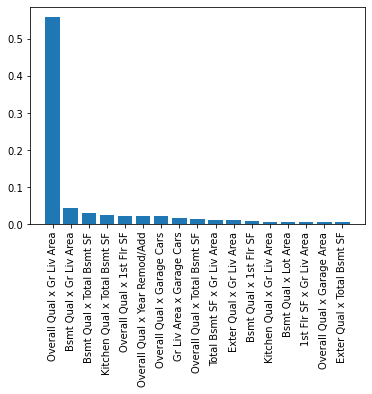

In [180]:
rf_feat_imports = dict(zip(list(prod_df.columns)[:-1], list(rf_reg.feature_importances_)))

rf_feat_imports = {k: v for k,v in dict(sorted(rf_feat_imports.items(), key=lambda x: -np.abs(x[1]))).items() 
                        if v > 0.005}

x, y = rf_feat_imports.keys(), rf_feat_imports.values()

plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()

We see from the feature importance plot above that the most important features involve products of some quality measure and a measure of some area.

In [181]:
for col in feat_cols:
    if np.abs(stats.pearsonr(df[col],df['SalePrice'])[0]) > 0.65:
        prod_df[col] = df[col].values

In [182]:
sale_prices = prod_df['SalePrice'].values

In [183]:
prod_df.drop(columns=['SalePrice'], inplace=True)

In [184]:
prod_df['SalePrice'] = sale_prices

In [185]:
X, y = prod_df.iloc[:,:-1].values, prod_df.iloc[:,-1].values

In [186]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [187]:
rf_reg = RandomForestRegressor(n_estimators=100, max_depth=22, random_state=21)
rf_reg.fit(X_train, y_train)
rf_reg.score(X_test, y_test)

0.8686799913927579

In [188]:
preds = rf_reg.predict(X_test)

In [189]:
x = np.linspace(0,np.max(y_test), 1000)

In [191]:
font = {
        'weight': 'bold',
        'size': 12,
        }

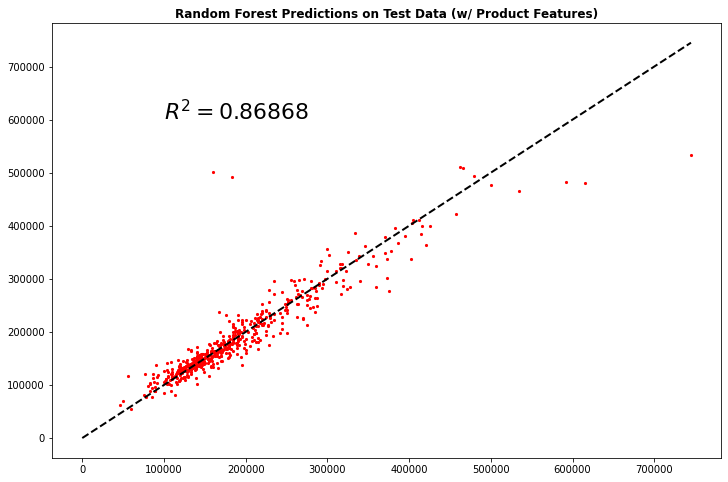

In [195]:
fig, ax = plt.subplots(figsize=(12,8))
plt.scatter(y_test,preds,s=4.5,color='red')
plt.plot(x,x,linestyle='dashed',linewidth=2,color='black')
plt.title('Random Forest Predictions on Test Data (w/ Product Features)', fontdict=font)
plt.text(100000, 600000,'$R^2 = 0.86868$', fontsize = 22, fontdict=font)
plt.show()

In [199]:
errors = [preds[i]-y_test[i] for i in range(len(y_test))]

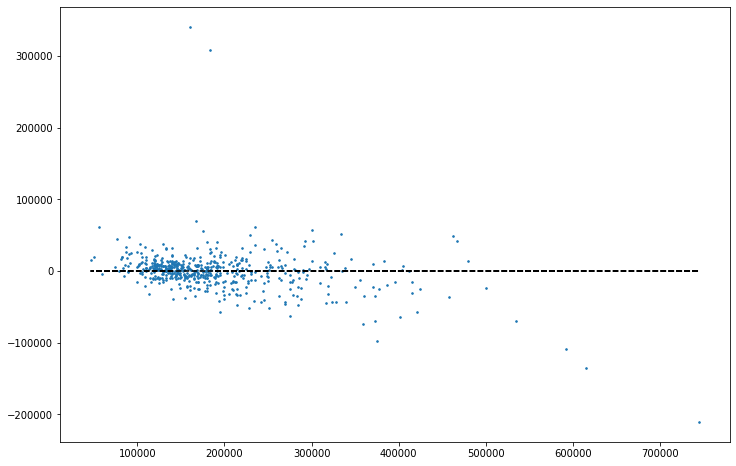

In [215]:
x_flat = y_test
y_flat = [0.0]*len(x_flat)
fig, ax = plt.subplots(figsize=(12,8))
plt.scatter(y_test, errors, s=2.5)
plt.plot(x_flat, y_flat, color='black', linestyle='dashed')

In [217]:
from sklearn.linear_model import LinearRegression

In [227]:
lin_reg = LinearRegression()

In [233]:
lin_reg.fit(y_test.reshape(-1,1), np.array(errors))

LinearRegression()

In [230]:
errors = np.array(errors)

In [234]:
lin_reg.score(y_test.reshape(-1,1), np.array(errors))

0.11797004156692203

In [236]:
lin_reg.coef_, lin_reg.intercept_

(array([-0.12446541]), 23538.354668738917)